In [ ]:
#paquetes
import pandas as pd 
import numpy as np  
import seaborn as sns   
import matplotlib.pylab as plt  
plt.style.use('ggplot')
import geopandas as gpd
from shapely import wkt


In [7]:
radios = pd.read_excel('data/Estratificación de radios censales - Rosario.xlsx', engine='openpyxl')
pobreza_radios = pd.read_excel('data/Pobreza Crónica x Radio Censal - Rosario.xlsx', engine='openpyxl')

In [ ]:
data = pd.read_excel('data/rosario f.xlsx')
barrios_pop = pd.read_excel('data/Registro Nacional de Barrios Populares 2023 - Rosario.xlsx', engine='openpyxl')

In [17]:
distritos = pd.read_csv('data/distritos_descentralizados_json.csv')

In [18]:
distritos.columns

Index(['DISTRITO', 'OBSERVACIO', 'GEOJSON'], dtype='object')

In [9]:
data.columns = [name.lower() for name in data.columns]
data.rename(columns={'int de voto x espacio': 'intencion'}, inplace=True)

In [ ]:
data.columns = [name.lower() for name in data.columns]
data.rename(columns={'int de voto x espacio': 'intencion'}, inplace=True)

In [11]:
radios.columns = [name.lower() for name in radios.columns]
pobreza_radios.columns = [name.lower() for name in pobreza_radios.columns]
barrios_pop.columns = [name.lower() for name in barrios_pop.columns]


In [13]:
barrios_pop.columns

Index(['id renabap', 'nombre del barrio',
       'cantidad de familias que viven en el barrio',
       'año de creación del barrio', 'década de creación del barrio',
       'tipología barrial', 'situación dominial',
       'situación predominante sobre la conexión a la energía eléctrica',
       'situación predominante sobre la conexión a la red cloacal',
       'situación predominante sobre la conexión a la red de agua',
       'situación predominante sobre la conexión a la red de gas', 'wkt',
       'código de provincia', 'nombre de provincia',
       'código de departamentos/comuna', 'nombre de departamentos/comuna',
       'código de radio', 'nombre de radio', 'superficie en km2',
       'latitud del centroide', 'longitud del centroide',
       'geometría en geojson'],
      dtype='object')

In [15]:
barrios_pop['geometry'] = barrios_pop['wkt'].apply(wkt.loads)
b_pop_geo = gpd.GeoDataFrame(barrios_pop, geometry='geometry', crs='EPSG:4326')
print(b_pop_geo.head())

   id renabap  nombre del barrio  cantidad de familias que viven en el barrio  \
0        1759         Zona Rural                                          165   
1        1806       La Esperanza                                          165   
2        6388       La Esperanza                                           66   
3        1865  Nuevo Alberdi Vía                                           44   
4        1892       Belgrano Vía                                           77   

   año de creación del barrio década de creación del barrio  \
0                           0                   Década 1980   
1                           0                   Década 1970   
2                           0                   Década 1980   
3                           0                   Década 2000   
4                           0                   Década 1990   

                 tipología barrial situación dominial  \
0                     Asentamiento                 NO   
1                   

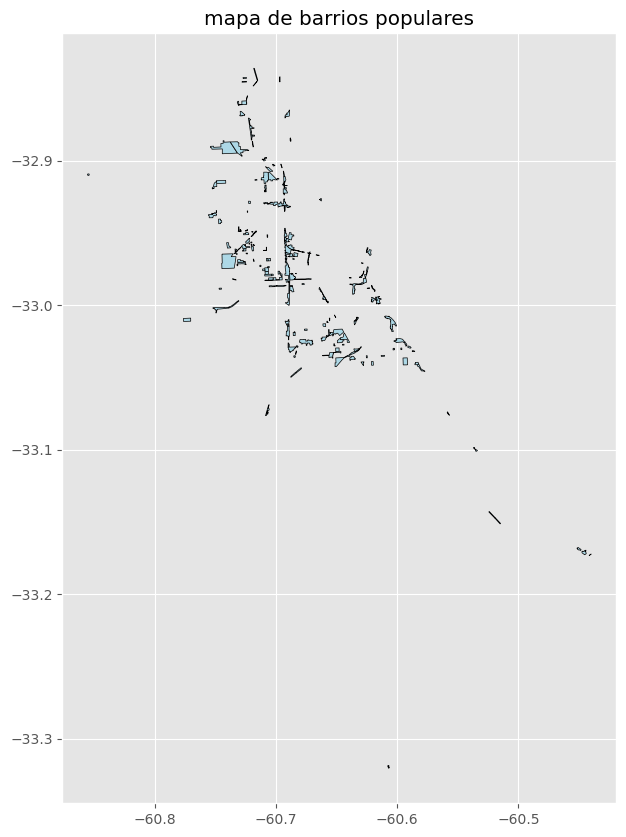

In [16]:
b_pop_geo.plot(figsize=(10 , 10), edgecolor='black', color='lightblue')
plt.title('mapa de barrios populares')
plt.show()

In [24]:
from shapely.geometry import shape

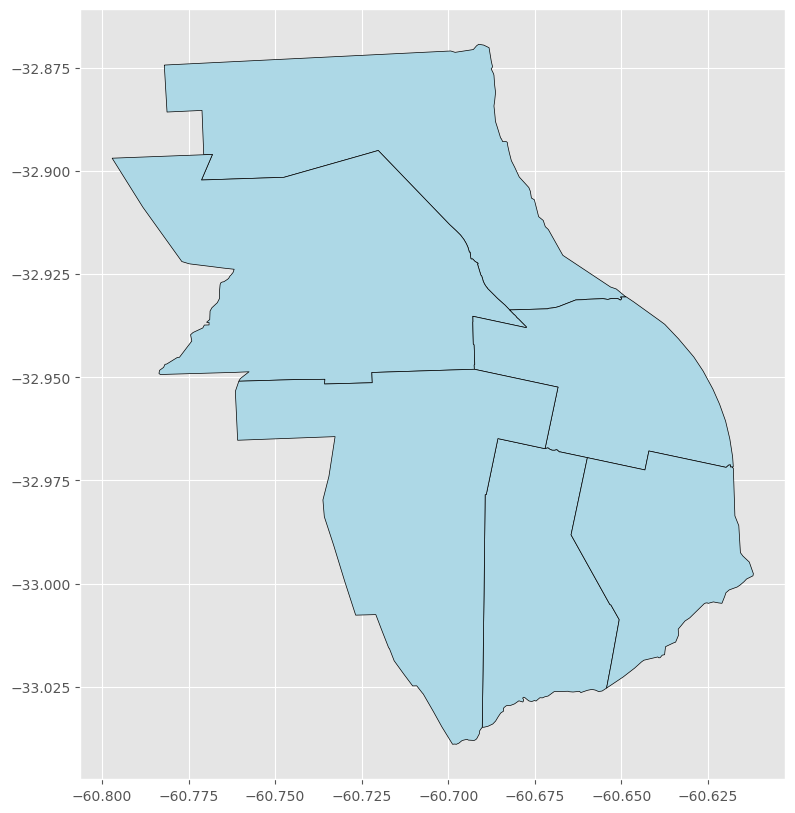

In [27]:
distritos_geo = gpd.read_file('data/distritos_descentralizados.gml')
mapa_distritos = distritos_geo.plot(color='lightblue', edgecolor='black', figsize=(10,10))
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4756\2737325235.py:12: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4756\2737325235.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


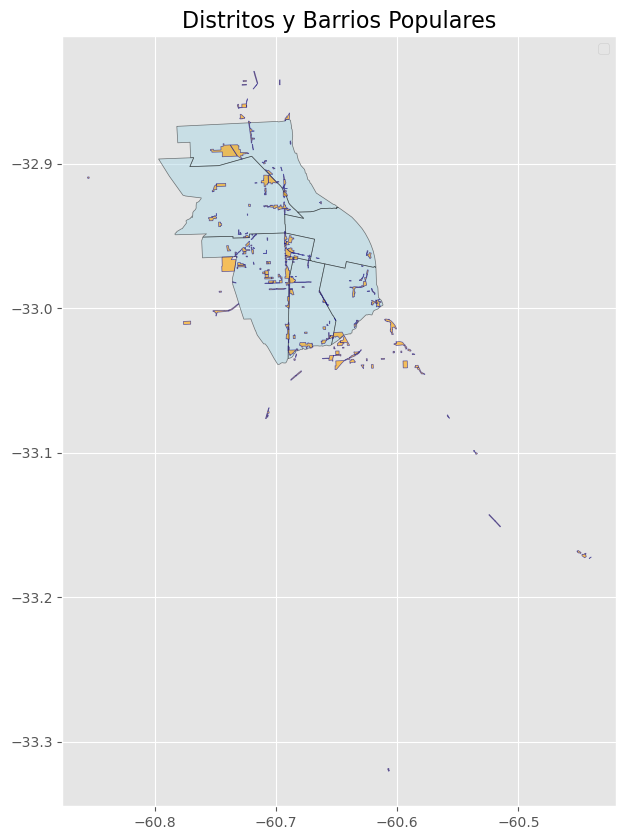

In [30]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar los distritos como base
distritos_geo.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5, label='Distritos')

# Superponer los barrios sobre el mapa
b_pop_geo.plot(ax=ax, color='orange', alpha=0.6, edgecolor='darkblue', label='Barrios')

# Configurar el título y la leyenda
plt.title("Distritos y Barrios Populares", fontsize=16)
plt.legend()
plt.show()

In [36]:
radios.columns

Index(['código de radio', 'cantidad total de personas',
       'cantidad total de hogares', 'hogares con al menos un indicador nbi',
       'hogares con computadora', 'hogares sin heladera',
       'cantidad de personas en el hogar', 'población de 3 a 4 años',
       'población de 14 a 25 años', 'población de 18 a 65 años',
       'hogares con hacinamiento (>= 3 personas por cuarto)',
       'hogares sin cañería de agua en la vivienda',
       'hogares sin cloaca / red pública',
       'hogares con desague a hoyo o pozo ciego sin cámara',
       'hogares sin piso tipo 1 (cerámica, baldosa, mosaico, mármol, madera, alfombrado)',
       'hogares con teléfono celular', 'hogares con teléfono fijo',
       'hogares con garrafa o leña como combustible usado principalmente para cocinar',
       'jefes sin secundaria completa', 'cónyugues sin secundaria completa',
       'hogares con jefe nacido en país limítrofe + perú',
       'personas nacidas en país limítrofe + perú',
       'hogares con 

In [37]:
pobreza_radios.columns

Index(['código de radio censal', 'código de departamento', 'departamento',
       'hogares', 'población', 'hogares en situación de pobreza crónica',
       'personas en situación de pobreza crónica',
       '% hogares en situación de pobreza crónica',
       '% personas en situación de pobreza crónica',
       'nivel de incidencia de pobreza crónica',
       '% hogares con hacinamiento crítico',
       '% hogares en vivienda inadecuada',
       '% hogares con déficit en conexión a red cloacal',
       '% hogares con jefe con primaria completa o menos',
       '% hogares con jefe con nivel secundario incompleto o menos',
       '% niños/as de entre 6 y 17 años que no asisten a establecimientos educativos formales',
       'código de provincia', 'nombre de provincia',
       'código de departamentos/comuna', 'nombre de departamentos/comuna',
       'código de radio', 'población total', 'total de hogares',
       'latitud del centroide', 'longitud del centroide', 'superficie en km2',
    

In [39]:
pobreza_radios['geometría en geojson'].dtypes

dtype('O')

In [40]:
import json

In [41]:
def convertir_geojson_a_geometry(geojson_str):
    # Convertir la cadena JSON en un diccionario
    geojson_obj = json.loads(geojson_str)
    return shape(geojson_obj)  # Convertir el diccionario en una geometría


In [42]:
pobreza_radios['geometry'] = pobreza_radios['geometría en geojson'].apply(convertir_geojson_a_geometry)

In [43]:
pobreza_geo = gpd.GeoDataFrame(pobreza_radios, geometry='geometry', crs='EPSG:4326')
print(pobreza_geo.head())

   código de radio censal  código de departamento departamento  hogares  \
0               820840101                   82084      Rosario      186   
1               820840213                   82084      Rosario       14   
2               820840202                   82084      Rosario      324   
3               820840203                   82084      Rosario      368   
4               820840214                   82084      Rosario      435   

   población  hogares en situación de pobreza crónica  \
0        635                                       21   
1         46                                        0   
2       1233                                       37   
3       1269                                       29   
4       1480                                       22   

   personas en situación de pobreza crónica  \
0                                       130   
1                                         0   
2                                       221   
3                 

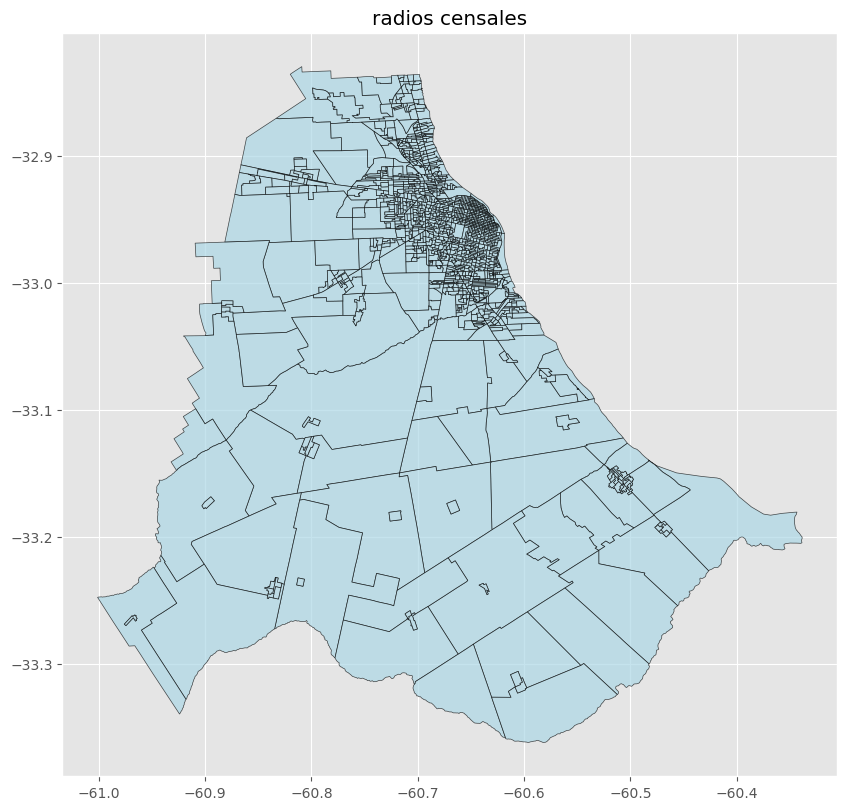

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
pobreza_geo.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.7)

plt.title('radios censales')
plt.show()

In [50]:
# Filtrar pobreza_radios para que solo queden las filas con coincidencias en data['radio']
radios_data = pobreza_radios[pobreza_radios['código de radio censal'].isin(data['radio'])]

# Verificar el resultado
print(radios_data.head())


    código de radio censal  código de departamento departamento  hogares  \
45               820840402                   82084      Rosario      253   
47               820840409                   82084      Rosario      404   
51               820840410                   82084      Rosario      246   
52               820840311                   82084      Rosario      505   
53               820840408                   82084      Rosario      279   

    población  hogares en situación de pobreza crónica  \
45        740                                        2   
47       1155                                        1   
51        691                                        0   
52       1828                                       84   
53        833                                        4   

    personas en situación de pobreza crónica  \
45                                         8   
47                                         9   
51                                         0   
52

In [49]:
# Verificar cuáles valores de 'código de radio censal' coinciden con data['radio']
coincidencias = pobreza_radios['código de radio censal'].isin(data['radio'])

# Mostrar cuántos valores son True (coincidencias)
print(coincidencias.sum())  # Cantidad de filas coincidentes


217
